In [37]:
#!pip install pandas-datareader

In [38]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [39]:
#get the Stock symbol from portfolio
#FAANG

assets=['LTI.NS','BLUEDART.NS','TATAMOTORS.NS']

#assign weight to stocks
#all five stock to add upto=1 and assign equal amount of weights to the stocks
#20% of each of this stock in this portfolio 
weights=np.array([0.33,0.33,0.33])

In [40]:
#stock start and end date

stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-11-15'

In [41]:
#create dataframe to store adjusted close price
df=pd.DataFrame()
#store adjusted close price of the stock into the datframe
for stock in assets:
    df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [42]:
df

,LTI.NS,BLUEDART.NS,TATAMOTORS.NS
Date,,,
2016-07-21,638.241150,5824.376953,491.049988
2016-07-22,640.437012,5780.333496,507.200012
2016-07-25,634.078369,5846.250977,509.000000
2016-07-26,633.255066,5773.513184,503.250000
2016-07-27,631.196472,5789.395996,510.100006
...,...,...,...
2021-11-09,6839.649902,7046.049805,509.649994
2021-11-10,6835.799805,7021.299805,510.750000
2021-11-11,6948.750000,7004.350098,503.450012


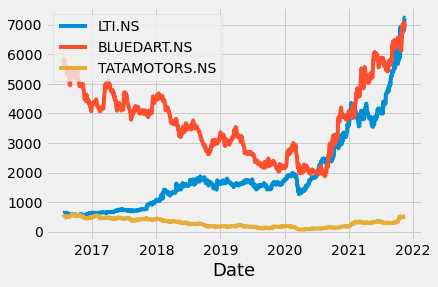

In [43]:
#visually show portfolio
my_stock=df
title='portfolio'
for c in my_stock.columns.values:
    plt.plot(my_stock[c],label=c)
plt.title=title
plt.xlabel('Date',fontsize=18)
plt.legend(my_stock.columns.values,loc='upper left')
plt.show()

In [44]:
#show daily simple return
returns=df.pct_change()
returns

,LTI.NS,BLUEDART.NS,TATAMOTORS.NS
Date,,,
2016-07-21,NaN,NaN,NaN
2016-07-22,0.003440,-0.007562,0.032889
2016-07-25,-0.009929,0.011404,0.003549
2016-07-26,-0.001298,-0.012442,-0.011297
2016-07-27,-0.003251,0.002751,0.013612
...,...,...,...
2021-11-09,0.001721,-0.004289,0.016454
2021-11-10,-0.000563,-0.003513,0.002158
2021-11-11,0.016523,-0.002414,-0.014293


In [45]:
#create and return annulize Covarience Matrix
#diagonal is varience , off diagonals are co-varience
#252 -> number of trading days in Year
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,LTI.NS,BLUEDART.NS,TATAMOTORS.NS
LTI.NS,0.117695,0.012184,0.032952
BLUEDART.NS,0.012184,0.104449,0.033146
TATAMOTORS.NS,0.032952,0.033146,0.243373


In [46]:
#portfolio varience
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06774458114249507

In [47]:
#portfolio volatility aka standard devaition
port_volatility=np.sqrt(port_variance)
port_volatility

0.26027789215086067

In [48]:
#calculate return of annual portfolio
#252 -> number of trading days in Year
portfolioSimpleAnnualReturn=np.sum(returns.mean() * weights) *252
portfolioSimpleAnnualReturn

0.2443316441738605

In [49]:
#Show the expected annual return, volatility (risk), and variance


percent_var= str(round(port_variance, 2) * 100) +  '%'                                                                                                        

percent_vols = str(round(port_volatility, 2) * 100 )+ '%'

percent_ret = str(round (portfolioSimpleAnnualReturn, 2) * 100) + '%'                                                                                                                                                                                                                                                                      

print ('Expected annual return: '+ percent_ret)

print ('Annual volatility /risk: '+ percent_vols)

print ('Annual variance: '+ percent_var)

Expected annual return: 24.0%
Annual volatility /risk: 26.0%
Annual variance: 7.000000000000001%


In [50]:
#!pip install PyPortfolioOpt

In [51]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import  expected_returns

In [52]:
#portfolio Optimization

#Calculate the Expected Return and annaualize sample covarience Matrix

mu=expected_returns.mean_historical_return(df)
mu

LTI.NS           0.595781
BLUEDART.NS      0.037357
TATAMOTORS.NS    0.007734
dtype: float64

In [53]:
S=risk_models.sample_cov(df)
S

,LTI.NS,BLUEDART.NS,TATAMOTORS.NS
LTI.NS,0.117695,0.012184,0.032952
BLUEDART.NS,0.012184,0.104449,0.033146
TATAMOTORS.NS,0.032952,0.033146,0.243373


In [54]:
#optimize for Max Sharp Ratio
#Sharp ration : basically to describe how much excess return you receive for some amout of volatility
#it masure performance of investment compare to investment that is risk free

ef=EfficientFrontier(mu,S)
weights = ef.max_sharpe()
weights

OrderedDict([('LTI.NS', 0.9999999998422928),
             ('BLUEDART.NS', 2.724035e-10),
             ('TATAMOTORS.NS', 2.986707e-10)])

In [55]:
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('LTI.NS', 1.0), ('BLUEDART.NS', 0.0), ('TATAMOTORS.NS', 0.0)])
Expected annual return: 59.6%
Annual volatility: 34.3%
Sharpe Ratio: 1.68


(0.5957811312464368, 0.3430668472795544, 1.6783350994485657)

In [56]:
#get discrete allocation of each share per stock
from pypfopt import  DiscreteAllocation,get_latest_prices
latest_prices=get_latest_prices(df)
print(latest_prices)

LTI.NS           7233.000000
BLUEDART.NS      7046.750000
TATAMOTORS.NS     511.100006
Name: 2021-11-15 00:00:00, dtype: float64


In [62]:
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=10000)

allocation,left_over=da.lp_portfolio()


print("Discrete Allocation : ", allocation)
print("Funds Remainning : ",left_over)
# Given the money 50000 to optimize it we can buy  {'RELIANCE.NS': 5, 'HDFCBANK.NS': 10, 'TCS.NS': 6} stock

Discrete Allocation :  {'LTI.NS': 1}
Funds Remainning :  2767.0


In [58]:
#!export CVXOPT_BUILD_GLPK=1
#!pip install cvxopt --no-binary cvxopt